### Problem : Performing EDA on Terrorism dataset to find the hot zone of terrorism
#### By Indrajith V

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as wg
wg.filterwarnings('ignore')
df = pd.read_csv('globalterrorismdb_0718dist.csv')
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [2]:
df.shape

(181691, 135)

In [3]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
df.isnull().sum()*100/len(df)

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.914993
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       86.219461
Length: 135, dtype: float64

In [6]:
df2 = df.dropna(axis ='columns')
df2.shape

(181691, 29)

In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
correl = df2.corr()
correl

,eventid,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,...,suicide,attacktype1,targtype1,individual,weaptype1,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.070646,0.002019,0.026215,...,0.137743,0.074173,0.079080,0.017939,-0.011716,-0.278927,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.070659,0.001995,0.026211,...,0.137736,0.074153,0.079082,0.017944,-0.011737,-0.278916,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.004501,0.001568,0.001734,...,0.003071,0.006705,-0.000948,-0.001661,0.007863,-0.005816,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,-0.005367,0.011434,-0.002702,...,0.003593,-0.005333,-0.000052,-0.003788,-0.003019,-0.003903,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,0.017784,-0.015029,0.001249,...,-0.033961,0.272272,0.011613,-0.008929,0.207802,-0.002096,0.071768,0.075147,0.027335,0.080767
country,-0.135039,-0.135023,-0.006305,0.003468,-0.020466,1.000000,0.148597,-0.012291,-0.006646,-0.038480,...,-0.050360,-0.021384,-0.019703,0.027918,-0.023708,0.032051,0.069904,0.067564,0.207281,0.153118
region,0.401371,0.401384,-0.002999,0.009710,0.038389,0.148597,1.000000,0.073678,0.025521,-0.013163,...,0.112672,0.007642,0.041396,-0.059963,0.013257,-0.183279,-0.082584,-0.071917,0.043139,-0.047900
vicinity,0.070646,0.070659,-0.004501,-0.005367,0.017784,-0.012291,0.073678,1.000000,0.003330,-0.000534,...,0.008352,0.006504,0.024644,-0.011986,0.001496,-0.019811,0.014487,0.015119,-0.008232,0.010325
crit1,0.002019,0.001995,0.001568,0.011434,-0.015029,-0.006646,0.025521,0.003330,1.000000,-0.008984,...,0.019039,0.027544,-0.040026,-0.025591,0.029257,-0.007595,0.089973,0.089888,0.015692,0.082288
crit2,0.026215,0.026211,0.001734,-0.002702,0.001249,-0.038480,-0.013163,-0.000534,-0.008984,1.000000,...,0.002770,0.005157,-0.101522,0.003311,-0.008549,-0.002711,-0.024153,-0.023829,-0.012980,-0.027752


<AxesSubplot:>

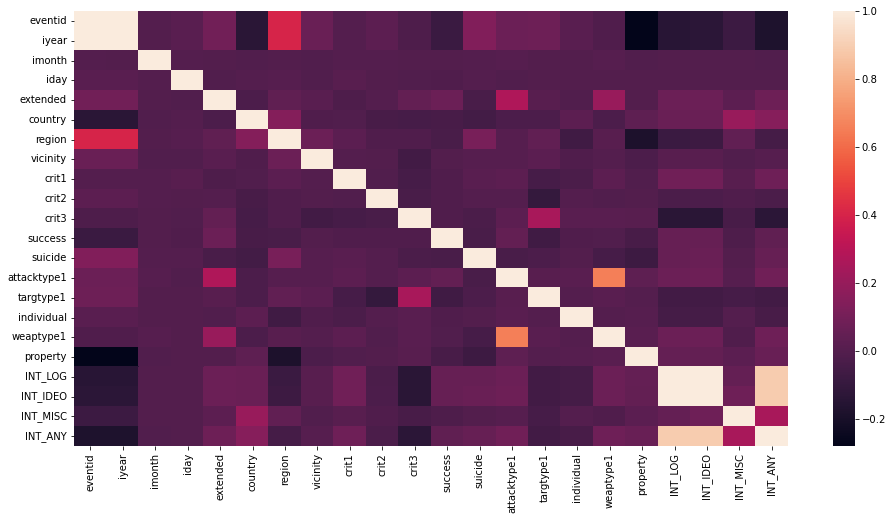

In [9]:
plt.figure(figsize=(16,8))
sns.heatmap(correl)

Text(0.5, 1.0, 'Regions Vs Number of Attacks')

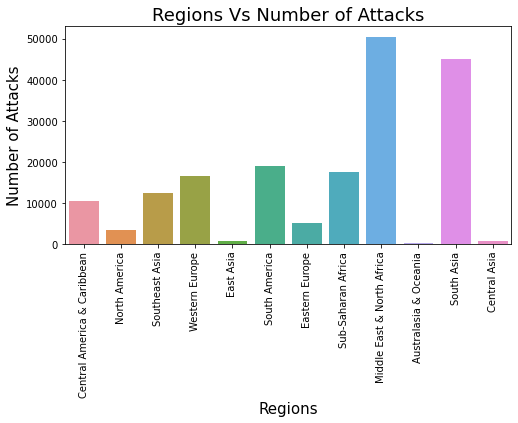

In [13]:
plt.figure(figsize =(8,4))
plt.xticks(rotation=90)
sns.countplot(df2['region_txt'])
plt.xlabel('Regions',fontsize =15)
plt.ylabel('Number of Attacks',fontsize =15)
plt.title('Regions Vs Number of Attacks',fontsize =18)

Text(0.5, 1.0, 'Year Vs Number of Attacks')

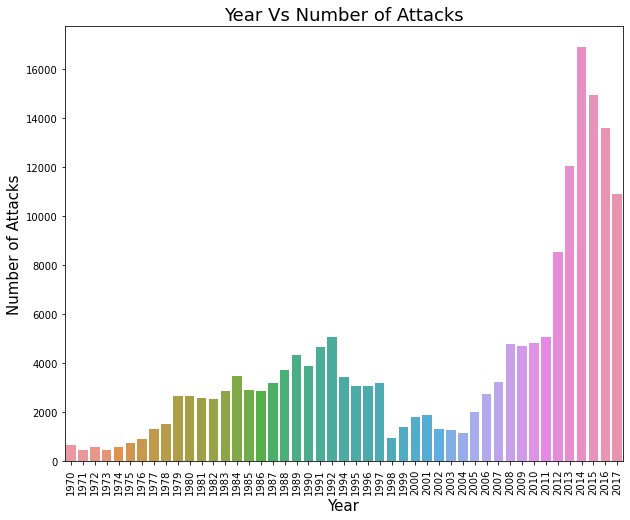

In [14]:
plt.figure(figsize =(10,8))
plt.xticks(rotation=90)
sns.countplot(df2['iyear'])  
plt.xlabel('Year',fontsize =15)
plt.ylabel('Number of Attacks',fontsize =15) 
plt.title('Year Vs Number of Attacks',fontsize =18)

Text(0.5, 0, 'Attack Region')

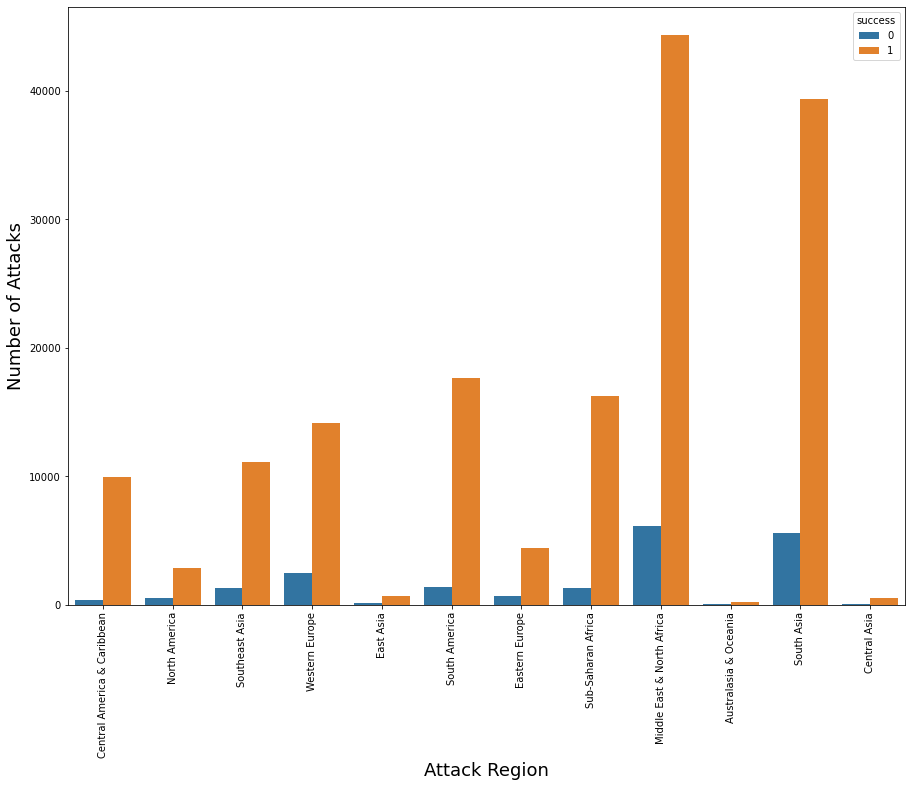

In [15]:
plt.rcParams["figure.figsize"] = 15, 11
sns.countplot(x = df2["region_txt"], hue="success", data=df2)
plt.ylabel("Number of Attacks", fontsize=18)
plt.xticks(rotation=90)
plt.xlabel("Attack Region", fontsize=18)

Text(0, 0.5, 'Number of Attacks')

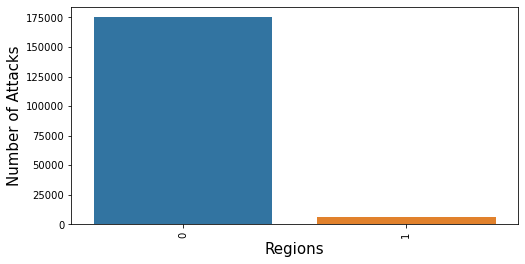

In [16]:
plt.figure(figsize =(8,4))
plt.xticks(rotation=90)
sns.countplot(df2['suicide'])
plt.xlabel('Regions',fontsize =15)
plt.ylabel('Number of Attacks',fontsize =15)

Text(0.5, 1.0, 'Top 10 Countries Having More Number of Attacks')

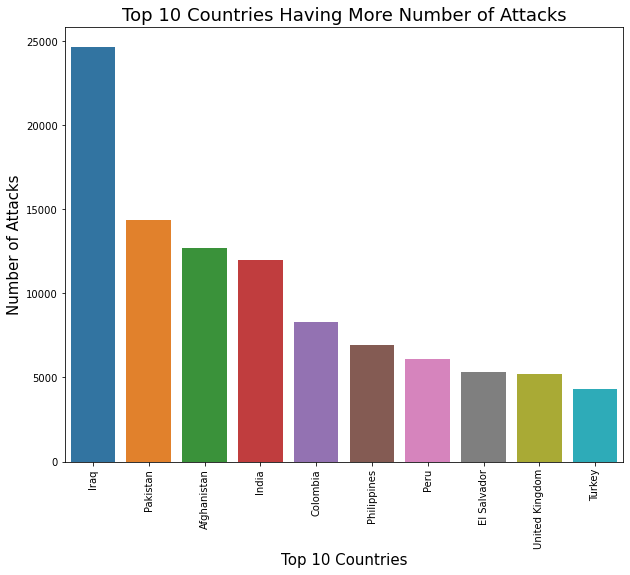

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x = df2["country_txt"].value_counts()[:10].index, y=df2["country_txt"].value_counts()[:10].values)
plt.xticks(rotation=90)
plt.xlabel('Top 10 Countries',fontsize = 15)
plt.ylabel("Number of Attacks",fontsize = 15)
plt.title('Top 10 Countries Having More Number of Attacks',fontsize =18)

Text(0.5, 1.0, 'Type Of Attack Vs Number of Attacks')

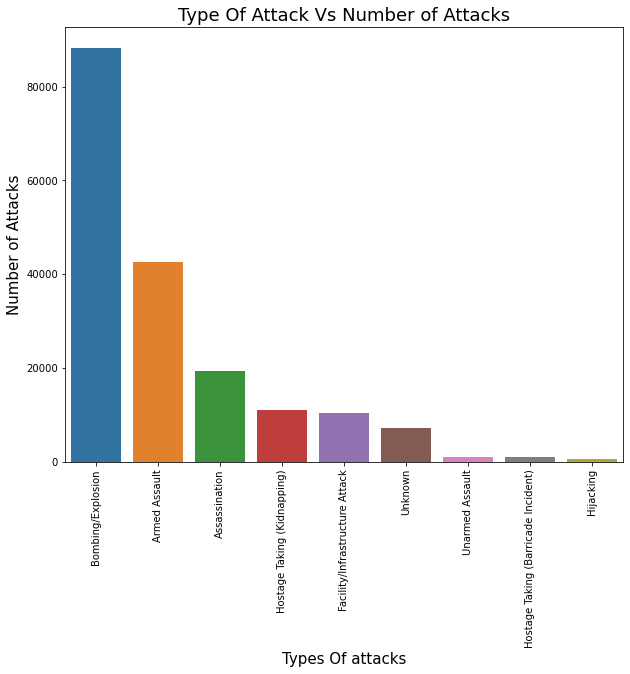

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x = df2["attacktype1_txt"].value_counts().index, y=df2["attacktype1_txt"].value_counts().values)
plt.xticks(rotation=90)
plt.xlabel('Types Of attacks',fontsize = 15)
plt.ylabel("Number of Attacks",fontsize = 15)
plt.title('Type Of Attack Vs Number of Attacks',fontsize =18)

Text(0.5, 1.0, 'Type Of Target Vs Number of Attacks')

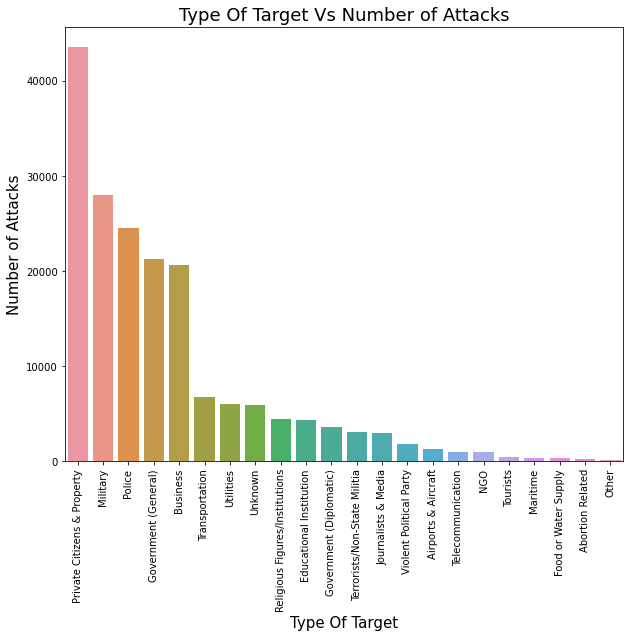

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(x = df2["targtype1_txt"].value_counts().index, y=df2["targtype1_txt"].value_counts().values)
plt.xticks(rotation=90)
plt.xlabel('Type Of Target',fontsize = 15)
plt.ylabel("Number of Attacks",fontsize = 15)  
plt.title('Type Of Target Vs Number of Attacks',fontsize =18)

Text(0.5, 1.0, 'Top 10 Terrorist Groups Having More Number of Attacks')

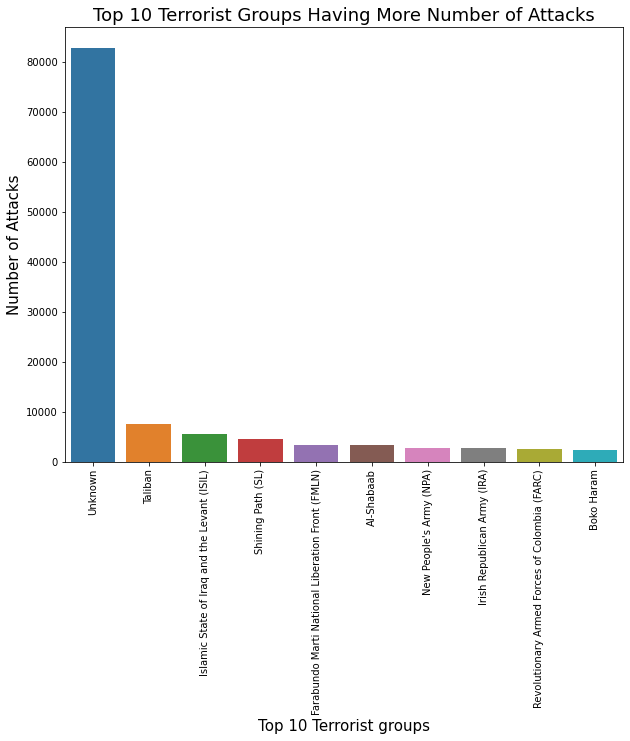

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(x = df2["gname"].value_counts()[:10].index, y=df2["gname"].value_counts()[:10].values)
plt.xticks(rotation=90)
plt.xlabel('Top 10 Terrorist groups',fontsize = 15)
plt.ylabel("Number of Attacks",fontsize = 15)
plt.title('Top 10 Terrorist Groups Having More Number of Attacks',fontsize =18)

### Conclusions

   - Most number of terrorist attacks are happend at Middle East & North Affrica and South Asia
   - Most targeted areas are private citizens and property, military, police,government  and buisness
   - Most attack types are Bombing/Explosion
   - Iraq is ranked first on Terrorism activity 
   - We can mark Iraq into the hotzone Of Terrorism
   